### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

### Read and Check Data

In [7]:
df = pd.read_csv('Final Transactions.csv')
df.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


In [9]:
df.isna().sum()

Unnamed: 0           0
TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

### Understand and Analysis of Data

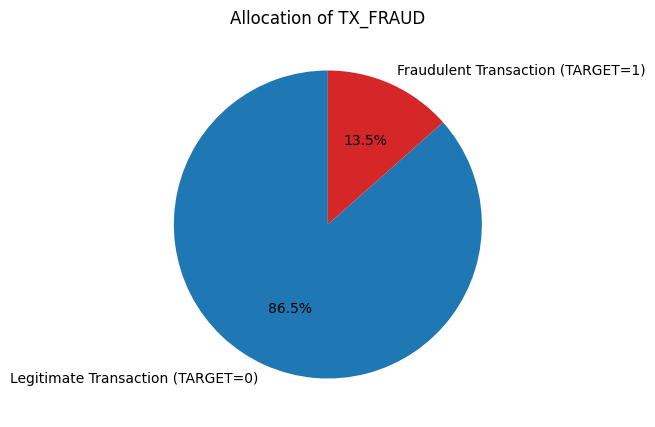

In [15]:
fraud_distribution = df['TX_FRAUD'].value_counts()

plt.figure(figsize=(5, 5))
fraud_distribution.plot.pie(
    labels=['Legitimate Transaction (TARGET=0)', 'Fraudulent Transaction (TARGET=1)'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1f77b4', '#d62728']  
)
plt.title('Allocation of TX_FRAUD')
plt.ylabel('') 
plt.show()

Since the data is quite unbalanced, with 13.5% fraudulent transactions and 86.5% legitimate transactions, we use SMOTE (Synthetic Minority Oversampling Technique) to address the imbalance. 

However, before applying SMOTE, we split the data to prevent oversampling from affecting the validation dataset, ensuring the model is evaluated on real, unaltered data.

In [ ]:
df = df.drop(df.index[0])

X = df.drop(columns=['TX_FRAUD'])
y = df['TX_FRAUD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)